# 03 - Modelling

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
plt.rcParams['figure.figsize'] = [18,10]

Importing data:

In [21]:
austin_w = pd.read_csv('austin_w.csv')
austin_w = austin_w.drop('Unnamed: 0',axis = 1)

In [22]:
cons_2016 = pd.read_csv('cons_2016.csv')
cons_2016 = cons_2016.drop('Unnamed: 0',axis = 1)

In [104]:
cons_2017 = pd.read_csv('cons_2017.csv')
cons_2017 = cons_2017.drop('Unnamed: 0',axis = 1)

In [25]:
cons_2016['Time'] = cons_2016['Time'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
cons_2016.index = cons_2016['Time']
cons_2016 = cons_2016.drop('Time',axis = 1)
cons_2016 = cons_2016.drop('Hour_End',axis = 1)

In [26]:
cons_2016.head()

,COAST,EAST,FAR_WEST,NORTH,NORTH_C,SOUTHERN,SOUTH_C,WEST,ERCOT
Time,,,,,,,,,
2016-01-01 01:00:00,9001.477932,1148.358788,2107.895986,788.543919,11409.33904,2829.993195,5479.057816,1088.091916,33852.75859
2016-01-01 02:00:00,8864.555456,1134.909662,2100.702470,782.355108,11235.17494,2830.075196,5405.955778,1080.369336,33434.09794
2016-01-01 03:00:00,8745.758728,1126.864026,2099.966167,781.237004,11151.96522,2789.470654,5334.159606,1069.644619,33099.06602
2016-01-01 04:00:00,8689.879755,1129.417663,2104.947864,785.264364,11209.70107,2757.999808,5302.938201,1073.658885,33053.80761
2016-01-01 05:00:00,8733.703094,1141.769602,2117.072608,790.248115,11428.71696,2769.678996,5364.298843,1096.410845,33441.89907


In [27]:
cons_2016_d = pd.DataFrame(columns = cons_2016.columns.tolist()) #Initialize empty df with sales_amount column


for month in range(1,13):
    for day in range(1,32):
         try:
            date = dt.datetime(2016,month,day,0,0,0)
            cons_2016_d.loc[dt.datetime(2016,month,day,0,0,0)] = cons_2016[(cons_2016.index.year == 2016) & (cons_2016.index.month == month) & (cons_2016.index.day == day)].sum()
         except: 
             continue
        

In [28]:
cons_2016_d_sc = cons_2016_d[['SOUTH_C']]

In [29]:
cons_2016_d_sc.head()

,SOUTH_C
2016-01-01,143236.772053
2016-01-02,156878.778092
2016-01-03,140600.293554
2016-01-04,152014.787298
2016-01-05,156903.233984


### Processing weather data:

In [30]:
austin_w['DATE'] = austin_w['DATE'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [31]:
austin_w.index = austin_w['DATE']
austin_w = austin_w.drop('DATE',axis=1)

In [33]:
austin_w_2016 = austin_w.iloc[0:366]

In [34]:
austin_w_2016.head()

,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
DATE,,,,,,
2016-01-01,0.00,0.0,0.0,47,50,44
2016-01-02,0.22,0.0,0.0,46,48,43
2016-01-03,0.00,0.0,0.0,48,61,33
2016-01-04,0.00,0.0,0.0,44,58,32
2016-01-05,0.00,0.0,0.0,41,57,29


In [35]:
austin_w_2016.tail()

,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
DATE,,,,,,
2016-12-27,0.0,0.0,0.0,71,76,59
2016-12-28,0.0,0.0,0.0,70,85,61
2016-12-29,0.0,0.0,0.0,65,71,43
2016-12-30,0.0,0.0,0.0,51,56,47
2016-12-31,0.0,0.0,0.0,59,79,50


### Compiling into single df

In [39]:
data_2016 = cons_2016_d_sc.copy()
data_2016['T_avg'] = austin_w_2016['TAVG']
data_2016['T_max'] = austin_w_2016['TMAX']
data_2016['T_min'] = austin_w_2016['TMIN']

In [41]:
data_2016.head()

,SOUTH_C,T_avg,T_max,T_min
2016-01-01,143236.772053,47,50,44
2016-01-02,156878.778092,46,48,43
2016-01-03,140600.293554,48,61,33
2016-01-04,152014.787298,44,58,32
2016-01-05,156903.233984,41,57,29


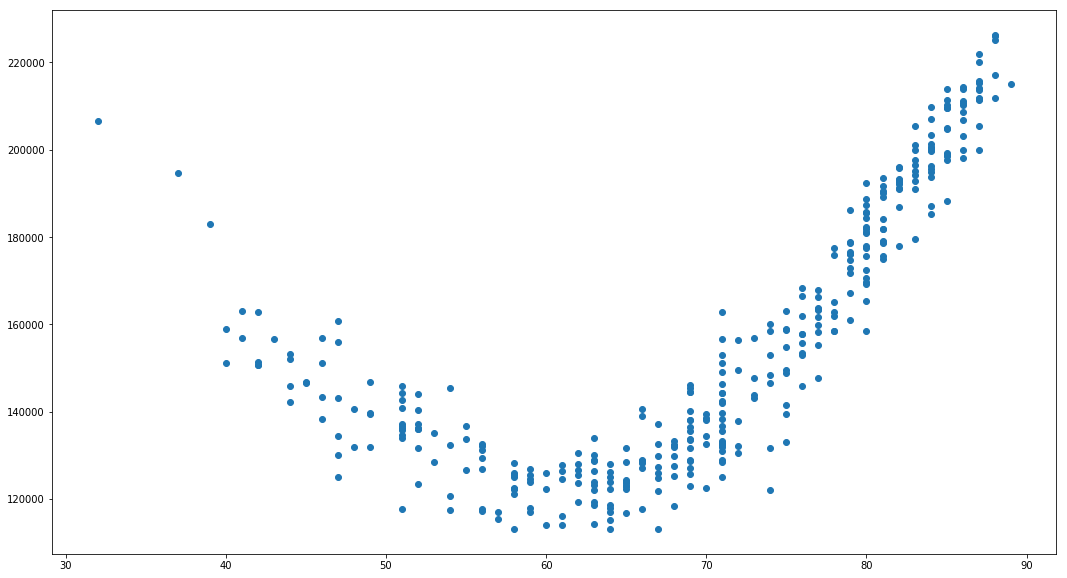

In [43]:
plt.scatter(data_2016['T_avg'],data_2016['SOUTH_C'])

## Making model

In [51]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

In [52]:
model = make_pipeline(PolynomialFeatures(2), Ridge())

In [53]:
x = data_2016['T_avg']
X = x[:, np.newaxis]

In [55]:
y = data_2016['SOUTH_C']

In [56]:
model.fit(X, y)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [58]:
x_plot = np.linspace(30,90,100)
X_plot = x_plot[:, np.newaxis]

In [59]:
y_plot = model.predict(X_plot)

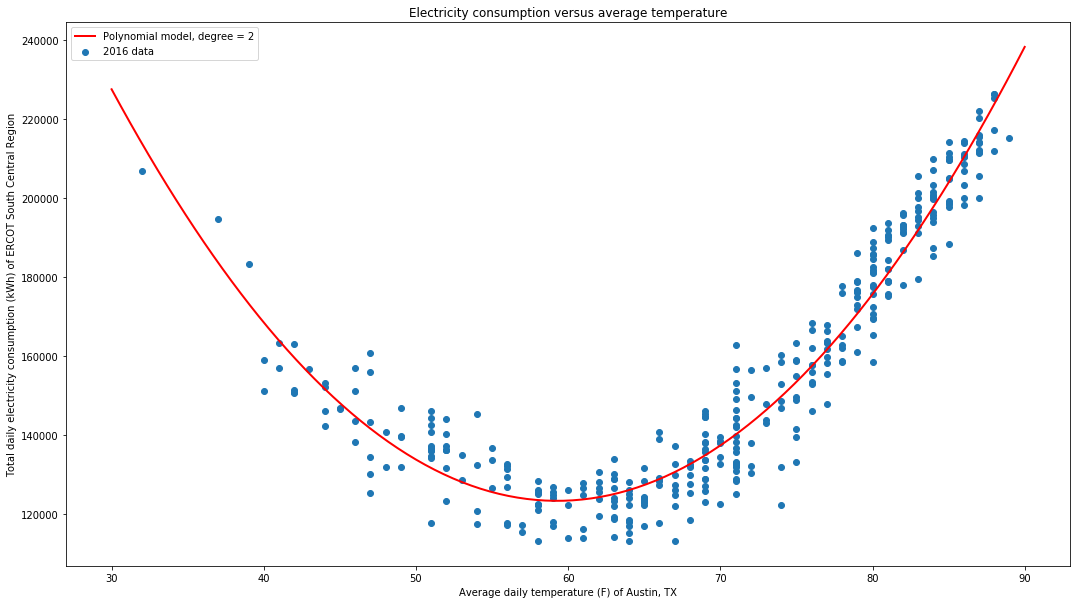

In [66]:
plt.scatter(data_2016['T_avg'],data_2016['SOUTH_C'], label = '2016 data')
plt.plot(x_plot, y_plot, color = 'red', linewidth = 2, label = 'Polynomial model, degree = 2')
plt.title('Electricity consumption versus average temperature')
plt.xlabel('Average daily temperature (F) of Austin, TX')
plt.ylabel('Total daily electricity consumption (kWh) of ERCOT South Central Region')
plt.legend()

## Testing model on 2017 data:

In [105]:
cons_2017['Time'] = cons_2017['Time'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
cons_2017.index = cons_2017['Time']
cons_2017 = cons_2017.drop('Time',axis = 1)
cons_2017 = cons_2017.drop('Hour_End',axis = 1)
cons_2017['SOUTH_C'] = cons_2017['SOUTH_C'].apply(lambda x: x.replace(",",""))
cons_2017['SOUTH_C'] = cons_2017['SOUTH_C'].apply(lambda x: float(x))

In [109]:
cons_2017.iloc[0,6]

4490.78

In [110]:
cons_2017_d = pd.DataFrame(columns = cons_2017.columns.tolist()) #Initialize empty df with sales_amount column


for month in range(1,13):
    for day in range(1,32):
         try:
            date = dt.datetime(2017,month,day,0,0,0)
            cons_2017_d.loc[dt.datetime(2017,month,day,0,0,0)] = cons_2017[(cons_2017.index.year == 2017) & (cons_2017.index.month == month) & (cons_2017.index.day == day)].sum()
         except: 
             continue
        

In [112]:
cons_2017_d.head() #we don't care that the other regions are strings for now, we're just looking at south central region.

,COAST,EAST,FAR_WEST,NORTH,NORTH_C,SOUTHERN,SOUTH_C,WEST,ERCOT
2017-01-01,"8,791.798,569.718,326.438,137.508,011.877,978....",896.75865.93839.05822.83814.02823.42844.95874....,"1,997.721,997.781,993.701,995.541,995.251,981....",683.62677.97672675.27663.62669.75684.49710.237...,"9,239.159,105.008,988.048,979.159,033.559,195....","2,366.632,332.742,237.512,178.102,133.952,122....",109475.94,"954.19951.03944.36943.19954.94972.56993.641,01...","29,420.6428,870.8128,211.7227,820.2927,628.962..."
2017-01-02,"9,287.708,836.838,588.178,480.788,506.028,644....",907.88860.94825.61808.31806.16814.8844.26892.2...,"2,025.361,999.532,002.332,006.882,020.302,053....",629.61609.44595.98592.78593.53605.85624.76653....,"9,152.378,568.228,163.607,917.047,850.377,966....","2,651.382,496.372,395.272,322.752,288.872,283....",120006.52,884.61882.15859.63851.11850.29860.01894.31955....,"30,108.5328,505.9027,488.5626,919.2026,832.562..."
2017-01-03,"8,935.498,516.598,238.188,102.788,094.308,265....","928.88903.05881.61874.08882.69903.46980.231,12...","2,127.652,076.282,063.202,068.392,074.232,084....",631.24618.6610.37609.21617.25636.96683.26762.5...,"9,132.168,581.188,237.558,099.938,149.138,438....","2,584.822,353.142,218.322,146.362,119.982,140....",126512.40,"935.05901.62889.44889.48899.07924.03993.961,11...","29,898.2928,269.6427,279.2626,878.2926,976.522..."
2017-01-04,"8,916.948,461.968,316.488,259.588,336.288,636....","1,190.791,179.511,181.021,195.411,274.481,341....","2,153.072,150.722,152.242,162.182,174.452,195....","878.09859.4862.63869.85882.15913.62968.461,052...","12,871.9012,556.7412,521.4712,679.1113,006.591...","2,522.192,305.042,192.582,142.842,119.692,159....",150783.28,"1,074.621,046.701,051.491,065.991,085.701,123....","34,549.0133,266.8732,946.9233,018.7033,664.343..."
2017-01-05,"9,784.509,471.979,198.329,051.129,031.149,237....","1,420.721,310.981,330.231,255.151,270.871,319....","2,204.782,207.562,190.112,186.922,193.172,205....","906.58894.05887.25891.17899.4924.94966.791,041...","14,223.0213,679.1113,471.3413,393.5913,484.361...","2,687.712,545.852,439.732,388.452,355.452,370....",146240.26,"1,158.381,122.661,108.751,108.881,108.901,127....","38,519.0737,044.7836,207.1035,702.8935,733.563..."


In [113]:
cons_2017_d_sc = cons_2017_d[['SOUTH_C']]

In [73]:
austin_w_2017 = austin_w.iloc[366:]

In [114]:
data_2017 = cons_2017_d_sc.copy()
data_2017['T_avg'] = austin_w_2017['TAVG']
data_2017['T_max'] = austin_w_2017['TMAX']
data_2017['T_min'] = austin_w_2017['TMIN']

In [116]:
data_2017.head()

,SOUTH_C,T_avg,T_max,T_min
2017-01-01,109475.94,61,76,49
2017-01-02,120006.52,63,77,53
2017-01-03,126512.40,58,77,38
2017-01-04,150783.28,46,48,33
2017-01-05,146240.26,49,64,36


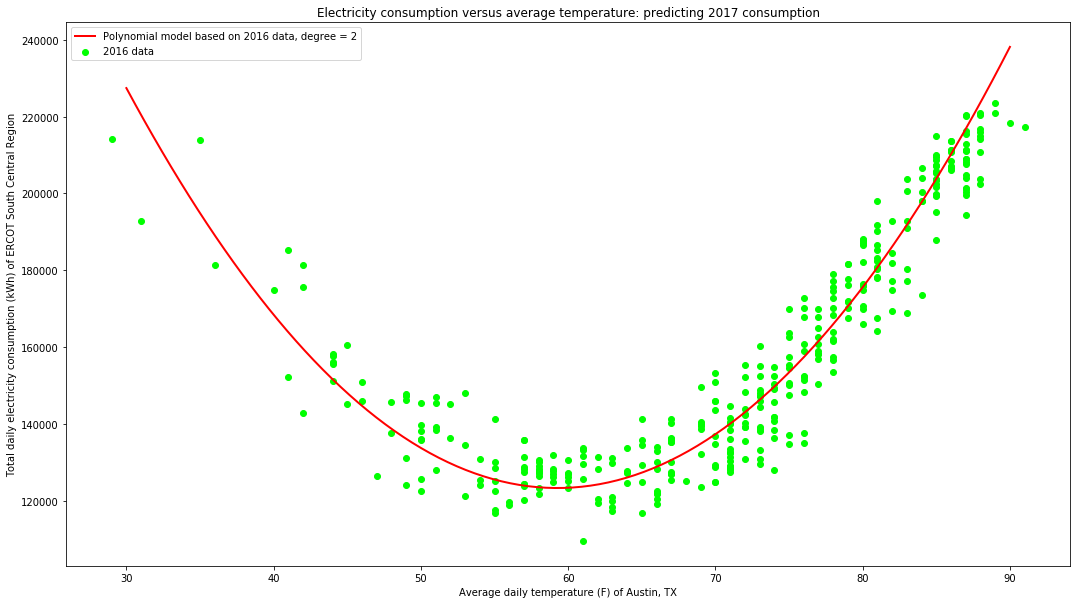

In [121]:
plt.scatter(data_2017['T_avg'],data_2017['SOUTH_C'], label = '2016 data',color = 'lime')
plt.plot(x_plot, y_plot, color = 'red', linewidth = 2, label = 'Polynomial model based on 2016 data, degree = 2')
plt.title('Electricity consumption versus average temperature: predicting 2017 consumption')
plt.xlabel('Average daily temperature (F) of Austin, TX')
plt.ylabel('Total daily electricity consumption (kWh) of ERCOT South Central Region')
plt.legend()